# Neural text summarization with PyTorch

## Overview

## Plan of attack

## Obtaining the dataset

[https://github.com/mahnazkoupaee/WikiHow-Dataset](https://github.com/mahnazkoupaee/WikiHow-Dataset)

> WikiHow is a new large-scale dataset using the online WikiHow (http://www.wikihow.com/) knowledge base *. The dataset is introduced in https://arxiv.org/abs/1810.09305. Please refer to the paper for more information regarding the dataset and its properties.
> 
> Each article consists of multiple paragraphs and each paragraph starts with a sentence summarizing it. By merging the paragraphs to form the article and the paragraph outlines to form the summary, the resulting version of the dataset contains more than 200,000 long-sequence pairs.


![what data represents](screen1.png)

* https://arxiv.org/pdf/1704.04368.pdf
* https://arxiv.org/pdf/1910.01335.pdf

In [4]:
!bash -c 'if [[ ! -d "data" ]]; then mkdir data; fi'

In [5]:
!bash -c 'if [[ ! -f "data/wikihow.zip" ]]; then curl -L# https://github.com/mahnazkoupaee/WikiHow-Dataset/archive/master.zip -o data/wikihow.zip; fi'

In [6]:
!bash -c 'if [[ ! -f "data/all_train.txt" ]]; then cd data; unzip wikihow.zip; mv WikiHow-Dataset-master/*.txt .; rm -fr WikiHow-Dataset-master; cd -; fi'

In [7]:
!bash -c 'if [[ ! -f "data/wikihow.csv" ]]; then curl -L# https://public.boxcloud.com/d/1/b1!Ubrgr_bl_IsdAW5Zl6UTxTe58keh6vAtIWUCv9ZKL5E6_01gpmB2sD-tFvEIfj3dhq1wj9Ir_0_x_oseFa_UMKwYeJezElmspBOtuFDaxGNgBpQd_fBT93gF6wzKe5AArJlzdBjOVH1WWkv6n6FSB_GzWzQlNzyTJ3ElsEZsljHPjxfChMLqBJFHc2DvTyplPXwa8lDXAqpz01A1BA3AXGAk4rxllaI1q-lhd8o8q3ICNtJhe9h03WrIhRPPMJXacRWb1iXxiTOilPu4RufcAjIq0VjzDe0qvpOY-Fz_IMymuiiva0Huf4bQjBm2tBwERne0CcpurY24ig79dwcDEicVOue_NXiaA4ZUMxNVEy6EI6y7PheXSWbY9-_4u3dR27w_wzDYqdLHs3gHckZ5NL6iFmuSnsYyFzRvbfJuI0Cjwi5g1FaudrAiDEoNHDyOmsn8bS5o53sAfcLlTgUYL9PcJ0GX-zDVzU0GS0uNRWHHsdY1ly0gCumAv-xl1bWl6dz4D-Dx6bYd31950cOr7BbJ_44xIksg5Hk7AIMttdOaAlot-NNTXechq2gqq80q8PiWVYqD5WQWx9wpZQzv9d1-FwOwcVitIUX_W--I8JvB3ttDA0qarDciGEGxdnwTA9XZ8wDC3Fz1eSGN52wEDdIDVQyEqiTH7gAXJLphV4UCIfdhoZqMrsEpfn2cRnv_f74Ttd3rOg_FstPK0wXOFVH97_rDMn3Qnp3yAqVjhMOVrm8ua6afpjaRw_1C30QDapT-eBWbOW8mOj0w7SkXUIHXmxl73Buxl4vl6oR0H9YbvKX9mJ0HTadKloN8BwRIci1a2GdIXa4F8WyTGQUqntfj3Trja9VMYYrOXYtBbi5KTUv7S1AD4_tVT4nO9XHlVVapPT8HUvP1Vzw4bfcFct2SdMMT1cLEJTvouHzYPRokoqVCFfPp11l8x848-kNaViIp8Z8ItsvJeUL5vzv67SdO7TnjtDNhDgJEWfvwNPRr2kygQcLG2FYkn9ymmv-sr8x8bgsdlPJu6QQqnYB29aEi8KgFB0h1YsNzkCT-0WOf0qssGlflTDpsNQ4HqIkcFB9u3S6bvR33Q7yX3cwV1nyi0lGdV1z0Y3CZCOw9aAWhV6KTQuRBFwSOJJ8x9Yf6khogi9e7prViIZPd2SIAyAMhkYDGs1NBzCXYh1oUhV1sFH6zeSsUoyIQAJYgf6CmVuOGFtwR23aRYJYIbbUJ2B6T0Mm92n8bcjw6eSuEcNpAVpJqVXjh/download -o data/wikihow.csv; fi'

In [3]:
import pathlib

In [1]:
def read_dataset(mode):
    return pathlib.Path(f"data/{mode}.txt").read_text().split("\n")

In [4]:
train, test, val, titles = [ read_dataset(mode) for mode in ["all_train", "all_test", "all_val", "titles"] ]

## Exploring the data

In [31]:
import random

In [12]:
random.sample(population=train, k=10)

['HowtoCleanBloodfromWalls1',
 'HowtoReduceSlowCookerMesses1',
 'HowtoGettheMostOutofReadingFashionMagazines',
 'HowtoSpyLegally',
 'HowtoTreataSwollenKnee4',
 'HowtoWhineYourWaist2',
 'HowtoPreventHardeningoftheArteries3',
 'HowtoDoubleSpaceinPages2',
 'HowtoTreatGastricUlcer',
 'HowtoVoteAgainstUnionization1']

In [13]:
random.sample(population=test, k=10)

['HowtoRunCrossCountry',
 'HowtoCalculateElectronegativity3',
 'HowtoPerformaHouseInspection2',
 'HowtoTellifaPearlIsReal2',
 'HowtoCleanYourOvenWithoutOdor2',
 'HowtoBeaGolfCaddy2',
 'HowtoUseCitrusPeelsAroundtheHouse2',
 'HowtoGetOutofaNonCompeteAgreement3',
 'HowtoBecomeanAmazonAssociate',
 'HowtoChooseaHairstyleforSpring1']

In [14]:
random.sample(population=val, k=10)

['HowtoDisciplineaChildThatHasAspergers3',
 'HowtoWriteanInsightfulSong',
 'HowtoBecomeaSigningAgent',
 'HowtoProgramaReplacementKeylessEntryFobfora1996Toyota4Runner',
 'HowtoUseMobileOdinonAndroid',
 'HowtoGiveUpSelfCriticismAsaPerfectionist3',
 'HowtoBecomeanOrganDonorinWisconsin3',
 'HowtoHideThingsinaBook2',
 'HowtoStudyUsingtheGroundwaterPrinciple',
 'HowtoGetOutofaBoringConversation']

In [15]:
random.sample(population=titles, k=10)

['HowtoUseEmojionAndroid1',
 'HowtoCreateaPoultice4',
 'HowtoDyeYourHairLightBrown3',
 'HowtoCalculateEffectiveInterestRate',
 'HowtoRemovePaintfromWood3',
 'HowtoStraightenYourSpine',
 'HowtoEnrollInaTribalCollege',
 'HowtoAddandDeleteUsersAccountsWithCommandPromptinWindows',
 'HowtoCookGroundTurkey2',
 'HowtoGetaPiscesMan3']

In [16]:
[ len(dataset) for dataset in [train, test, val, titles] ]

[168128, 6000, 6000, 180129]

In [5]:
import pandas as pd

In [6]:
articles = pd.read_csv("data/wikihow.csv")

In [19]:
articles.sample(n=10, random_state=2020)

,headline,title,text
87404,"\nPreheat the oven to 400ºF.,\nAdd the ingredi...",How to Make Healthy Vegan Chocolate Pumpkin Nu...,Prepare the cake pan. The size of the pan is ...
101553,\nOpen a new blank Office Word 2007 document i...,How to Create a Brochure in Microsoft Word 20073,", The ruler at the top of the window shows the..."
83543,\nApply the Riemann sum definition of an integ...,How to Calculate Line Integrals,We want our function f{\displaystyle f} to be...
141484,\nNavigate to Twitter and compose a tweet as y...,How to Tweet Someone2,", For example, if mentioning wikiHow in your t..."
110654,"\nOpen the Maps app.,\nTap on the search box.,...",How to Add Stops to a Route on Apple Maps,The icon looks like a map and is located on t...
131197,"\nPrep your veggies and herb.,\nSaute your oni...",How to Make Pizza Pockets3,Dice your onion. Mince your garlic. Slice or ...
2805,"\nHave your yoga mat, a medicine ball and a se...",How to Do Medicine Ball Back Exercises3,You will need a mat or another comfortable ar...
15915,"\nNotice pain in one of your testicles.,\nLook...",How to Know if You Have Epididymitis,This is the most common sign of epididymitis....
208172,"\nWarm up your muscles.,\nFind a smooth, flat ...",How to Headspin,"To do a headspin, you will use your legs, arm..."
201563,\nFind digital pictures of everyone in your fa...,How to Make Family Photo Magnets1,You can take new pictures and load them from ...


In [20]:
len(articles['title'])

215365

In [21]:
len(articles['title'].unique())

215365

In [7]:
articles['normalized_title'] = articles['title'].str.replace(' ', '')

In [23]:
articles.sample(n=10, random_state=2020)

,headline,title,text,normalized_title
87404,"\nPreheat the oven to 400ºF.,\nAdd the ingredi...",How to Make Healthy Vegan Chocolate Pumpkin Nu...,Prepare the cake pan. The size of the pan is ...,HowtoMakeHealthyVeganChocolatePumpkinNutCake
101553,\nOpen a new blank Office Word 2007 document i...,How to Create a Brochure in Microsoft Word 20073,", The ruler at the top of the window shows the...",HowtoCreateaBrochureinMicrosoftWord20073
83543,\nApply the Riemann sum definition of an integ...,How to Calculate Line Integrals,We want our function f{\displaystyle f} to be...,HowtoCalculateLineIntegrals
141484,\nNavigate to Twitter and compose a tweet as y...,How to Tweet Someone2,", For example, if mentioning wikiHow in your t...",HowtoTweetSomeone2
110654,"\nOpen the Maps app.,\nTap on the search box.,...",How to Add Stops to a Route on Apple Maps,The icon looks like a map and is located on t...,HowtoAddStopstoaRouteonAppleMaps
131197,"\nPrep your veggies and herb.,\nSaute your oni...",How to Make Pizza Pockets3,Dice your onion. Mince your garlic. Slice or ...,HowtoMakePizzaPockets3
2805,"\nHave your yoga mat, a medicine ball and a se...",How to Do Medicine Ball Back Exercises3,You will need a mat or another comfortable ar...,HowtoDoMedicineBallBackExercises3
15915,"\nNotice pain in one of your testicles.,\nLook...",How to Know if You Have Epididymitis,This is the most common sign of epididymitis....,HowtoKnowifYouHaveEpididymitis
208172,"\nWarm up your muscles.,\nFind a smooth, flat ...",How to Headspin,"To do a headspin, you will use your legs, arm...",HowtoHeadspin
201563,\nFind digital pictures of everyone in your fa...,How to Make Family Photo Magnets1,You can take new pictures and load them from ...,HowtoMakeFamilyPhotoMagnets1


In [35]:
articles[articles.headline.isna()]

,headline,title,text,normalized_title
133,NaN,How to Write a Love Letter to a Girl You Do No...,NaN,HowtoWriteaLoveLettertoaGirlYouDoNotKnow1
310,NaN,How to Ask Your Crush for Their Cell Phone Num...,NaN,HowtoAskYourCrushforTheirCellPhoneNumber1
323,NaN,How to Talk to a Girl You Like for the First T...,NaN,HowtoTalktoaGirlYouLikefortheFirstTime2
324,NaN,How to Talk to a Girl You Like for the First T...,NaN,HowtoTalktoaGirlYouLikefortheFirstTime3
1483,NaN,How to Be a Fashionista at a Western Performan...,NaN,HowtoBeaFashionistaataWesternPerformanceShow5
...,...,...,...,...
212978,NaN,How to Make a Spider Man Costume1,NaN,HowtoMakeaSpiderManCostume1
213861,NaN,How to Accompany a Singer on Piano4,NaN,HowtoAccompanyaSingeronPiano4
214179,NaN,How to Speak Klingon3,NaN,HowtoSpeakKlingon3
214354,NaN,How to Measure Decibels1,NaN,HowtoMeasureDecibels1


In [8]:
articles = articles[~articles.headline.isna()]
articles = articles[~articles.text.isna()]

In [37]:
len(articles[articles['normalized_title'].isin(train)]['normalized_title'].unique())

157304

In [27]:
len(train)

168128

In [28]:
articles[articles['normalized_title'] == 'HowtoBuildaFerrocementTank1']

,headline,title,text,normalized_title
177726,\nCut the chicken wire/hexagonal wire mesh usi...,How to Build a Ferrocement Tank1,The tank size will dictate the necessary size...,HowtoBuildaFerrocementTank1


In [29]:
[ t for t in train if 'errocement' in t ]

[]

In [30]:
[ t for t in test if 'errocement' in t ]

[]

In [31]:
[ t for t in val if 'errocement' in t ]

[]

In [9]:
all_titles = set(articles['normalized_title'].unique())

In [33]:
len(set(train) & all_titles)

157304

In [34]:
len(set(test) & all_titles)

5580

In [35]:
len(set(val) & all_titles)

5600

In [10]:
train = list(set(train) & all_titles)

In [11]:
test = list(set(test) & all_titles)

In [12]:
val = list(set(val) & all_titles)

## Exploring the data more

In [42]:
import spacy

In [44]:
nlp = spacy.load(
    "en_core_web_lg",
    disable=["tagger", "parser", "ner", "textcat"]
)

In [41]:
articles.iloc[0]['headline']

'\nKeep related supplies in the same area.,\nMake an effort to clean a dedicated workspace after every session.,\nPlace loose supplies in large, clearly visible containers.,\nUse clotheslines and clips to hang sketches, photos, and reference material.,\nUse every inch of the room for storage, especially vertical space.,\nUse chalkboard paint to make space for drafting ideas right on the walls.,\nPurchase a label maker to make your organization strategy semi-permanent.,\nMake a habit of throwing out old, excess, or useless stuff each month.'

In [42]:
nlp(articles.iloc[0]['headline'])


Keep related supplies in the same area.,
Make an effort to clean a dedicated workspace after every session.,
Place loose supplies in large, clearly visible containers.,
Use clotheslines and clips to hang sketches, photos, and reference material.,
Use every inch of the room for storage, especially vertical space.,
Use chalkboard paint to make space for drafting ideas right on the walls.,
Purchase a label maker to make your organization strategy semi-permanent.,
Make a habit of throwing out old, excess, or useless stuff each month.

In [45]:
nlp(articles.iloc[0]['headline']).vector

array([-2.14049383e-03,  1.20533675e-01, -1.50411963e-01, -2.95907892e-02,
        5.36861718e-02,  1.87308304e-02, -6.58619851e-02, -1.11265108e-01,
       -5.44577129e-02,  1.81314087e+00, -1.56057566e-01,  7.46618360e-02,
        5.50983138e-02, -5.07150292e-02, -1.08529627e-01, -7.27834404e-02,
       -2.78506801e-02,  1.32611310e+00, -1.87722608e-01,  1.68871153e-02,
       -1.80466007e-02,  7.95699731e-02, -2.61089355e-02, -4.26516421e-02,
        5.39166480e-02,  4.90100309e-03, -1.93231814e-02, -3.00815478e-02,
        6.83127269e-02, -1.12207130e-01,  2.01380365e-02, -8.36755894e-03,
       -8.37247446e-02,  1.17265426e-01,  8.59610960e-02, -1.14325628e-01,
        1.02570681e-02,  2.87171900e-02, -9.53881163e-03, -3.63615490e-02,
       -8.56569931e-02,  1.22249767e-01,  3.23277805e-03, -1.01762362e-01,
       -5.48178852e-02,  2.22754292e-02, -1.04785562e-01,  1.43406785e-03,
        3.80684845e-02,  1.15816528e-02,  4.88370322e-02,  2.40807012e-02,
        5.68812415e-02,  

How many megabytes needed to form a matrix with one article per row and one float32 from the document vector in each column:

In [237]:
articles_sample = articles.sample(n=10000)

In [238]:
articles_vectors = articles_sample['headline'].apply(lambda headline : nlp(headline).vector)

In [60]:
import numpy as np

In [50]:
from sklearn.cluster import KMeans

In [239]:
kmeans = KMeans(n_clusters=10, random_state=0).fit(np.stack(articles_vectors.to_numpy()))

In [240]:
kmeans.labels_

array([8, 7, 8, ..., 0, 4, 3], dtype=int32)

In [194]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [241]:
vectorizer=TfidfVectorizer(use_idf=True, stop_words=spacy.lang.en.stop_words.STOP_WORDS)

In [242]:
cluster_docs = [ '\n'.join(articles_sample[kmeans.labels_ == ix].headline) for ix in range(0, max(kmeans.labels_) + 1) ]

In [243]:
len(cluster_docs)

10

In [244]:
vectorizer.fit(articles_sample.headline)

/opt/conda/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ll', 've'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=None,
                min_df=1, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True,
                stop_words={"'d", "'ll", "'m", "'re", "'s", "'ve", 'a', 'about',
                            'above', 'across', 'after', 'afterwards', 'again',
                            'against', 'all', 'almost', 'alone', 'along',
                            'already', 'also', 'although', 'always', 'am',
                            'among', 'amongst', 'amount', 'an', 'and',
                            'another', 'any', ...},
                strip_accents=None, sublinear_tf=False,
                token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
                vocabulary=None)

In [245]:
X=vectorizer.transform([nlp(doc).text for doc in cluster_docs])

In [246]:
X

<10x22575 sparse matrix of type '<class 'numpy.float64'>'
	with 53544 stored elements in Compressed Sparse Row format>

In [247]:
def defining_words(ix, X, vectorizer):
    df = pd.DataFrame(X[ix].T.todense(), index=vectorizer.get_feature_names(), columns=["tfidf"])
    return ', '.join(list(df[df.tfidf > 0.1].sort_values(['tfidf'], ascending=False).index[:10]))

In [248]:
for ix in range(0, max(kmeans.labels_) + 1):
    words = defining_words(ix, X, vectorizer)
    
    print(f"{ix}\t{words}")

0	click, tap, select, open, button, file, menu, type, app, download
1	hair, wear, apply, use, color, brush, choose, face, wash, shoes
2	don, people, ask, time, know, person, talk, want, friends, help
3	doctor, eat, symptoms, diet, dog, foods, avoid, cat, pain, use
4	use, sure, find, dog, time, look, right, place, start, want
5	cut, draw, place, end, paper, remove, piece, fold, fabric, glue
6	add, mixture, heat, minutes, bowl, pour, mix, oven, sugar, water
7	water, use, dry, remove, clean, oil, wash, soil, rinse, apply
8	learn, use, practice, find, don, try, know, time, play, choose
9	information, determine, check, business, find, consider, online, use, company, application


In [254]:
[len(nlp(h)) for h in articles.headline[:10]]

[115, 177, 62, 159, 84, 83, 41, 32, 113, 94]

In [55]:
from plotnine import ggplot, geom_bar, aes

In [47]:
from tqdm.notebook import tqdm
tqdm.pandas()

/opt/conda/lib/python3.7/site-packages/tqdm/std.py:658: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


In [48]:
articles['headline_doc'] = tqdm(
    nlp.pipe(
        articles.headline,
        disable=["tagger", "parser", "ner", "textcat"]
    ),
    total=len(articles)
)

In [49]:
len(articles)

214294

In [50]:
articles['text_doc'] = tqdm(
    nlp.pipe(
        articles.text,
        disable=["tagger", "parser", "ner", "textcat"]
    ),
    total=len(articles)
)

In [51]:
df_lengths = pd.DataFrame({
    'headline_length': articles.headline_doc.progress_apply(lambda d: len(d)),
    'text_length':     articles.text_doc.progress_apply(lambda d: len(d))
})

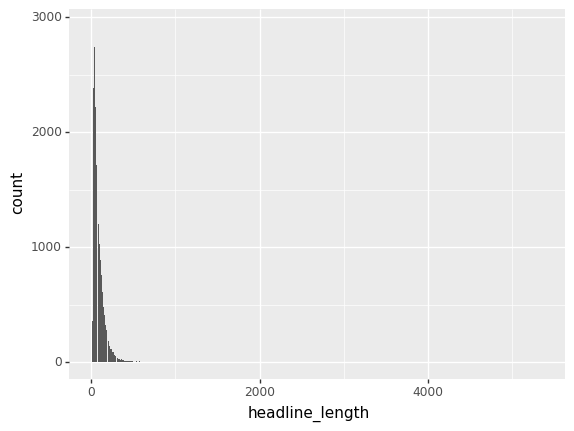

<ggplot: (8786075879749)>

In [58]:
ggplot(df_lengths) + geom_bar(aes(x='headline_length'))

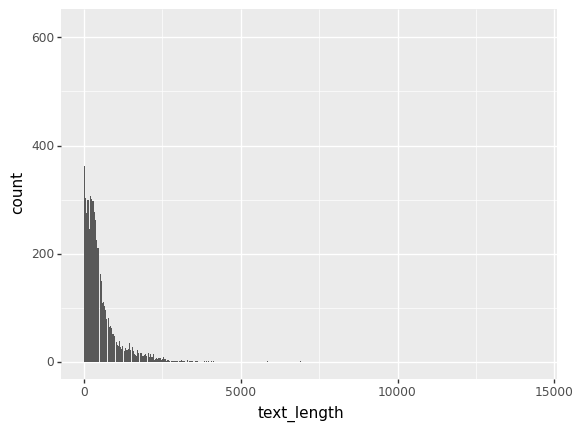

<ggplot: (8786075884629)>

In [59]:
ggplot(df_lengths) + geom_bar(aes(x='text_length'))

In [60]:
df_lengths.describe()

,headline_length,text_length
count,214294.000000,214294.000000
mean,84.711709,522.364616
std,73.541237,566.996252
min,2.000000,1.000000
25%,38.000000,169.000000
50%,63.000000,356.000000
75%,109.000000,638.000000
max,5364.000000,14372.000000


In [61]:
df_lengths.quantile([0.75, 0.8, 0.85, 0.9, 0.95])

,headline_length,text_length
0.75,109.0,638.0
0.80,123.0,747.0
0.85,140.0,919.0
0.90,166.0,1214.0
0.95,212.0,1714.0


In [72]:
len(articles[(df_lengths.headline_length <= 140) & (df_lengths.text_length <= 919)])

161820

In [73]:
MAX_HEADLINE_LENGTH = 140
MAX_TEXT_LENGTH = 919

In [18]:
articles[['headline', 'text', 'normalized_title']].to_parquet(
    'data/articles.parquet.gzip',
    compression='gzip'
)

/opt/conda/lib/python3.7/site-packages/fastparquet/dataframe.py:5: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import CategoricalIndex, RangeIndex, Index, MultiIndex


In [19]:
import torch
from transformers import *
from torch.utils.data import Dataset

In [48]:
class ArticlesDataset(Dataset):
    def __init__(self, parquet_file_path, keys, transform=None):
        self.data = self.read_data(parquet_file_path, keys)
        self.transform = transform
        
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()
            
        data = self.data.iloc[idx, :]
            
        if self.transform:
            data = self.transform(data)

        return data
        
    def read_data(self, parquet_file_path, keys):
        data = pd.read_parquet(parquet_file_path)
        
        return data

In [47]:
class Tokenize(object):
    def __init__(self):
        self.tokenizer = AutoTokenizer.from_pretrained("bert-base-cased-finetuned-mrpc")
        
    def __call__(self, sample):
        return {
            'text_ids': self.tokenizer.encode(sample['text']),
            'headline_ids': self.tokenizer.encode(sample['headline']),
            'normalized_title': sample['normalized_title'],
            'text': sample['text'],
            'headline': sample['headline']
        }

In [49]:
dataset = ArticlesDataset(
    "data/articles.parquet.gzip",
    keys=train,
    transform=Tokenize()
)

In [55]:
dataset[10].keys()

Index(['headline', 'text', 'normalized_title'], dtype='object')

## Reading list

* [Comprehensive Guide to Text Summarization using Deep Learning in Python](https://www.analyticsvidhya.com/blog/2019/06/comprehensive-guide-text-summarization-using-deep-learning-python/)
* [Neural Text Summarization](https://cs224d.stanford.edu/reports/urvashik.pdf)
* [ALBERT: A Lite BERT for Self-supervised Learning of Language Representations](https://arxiv.org/abs/1909.11942)
([HTML](https://www.arxiv-vanity.com/papers/1909.11942/))
* https://arxiv.org/abs/1711.09534


## Plan of attack

### Architecture